<a href="https://colab.research.google.com/github/Cyberine101/ML-Algorithms/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network Homework

This is the 3rd homework assignment for CAP 4630 and we will go through some primary operations for image processsing and implement one of the earilest representative convolution neural network - LeNet-5 . \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
For section 1, when you implement covolution and maxpooling, you are **not** allowed to use built-in functions in Machine Learning libaries such as Scikit-learn Keras, Tensorflow, Pytorch; but you are encouraged to employ Keras for second section.

**Task Overview:**
- Basic operations for Digital Image Processing (DIP)
- LeNet-5 (Google Colab is recommended for implementation)

## 1 - Basic Image Processing ##
### 1.1 Data Preparation

Import packages and prepare image data as an array for image processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import imageio and call imread to convert image to an array.
3. **DISPLAY** the image in the output box before image-array conversion.
4. **PRINT OUT** the size of the array
5. **PRINT OUT** the numeric matrix form of image, i.e. the obtained array after image-array conversion.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [imageio](https://imageio.github.io/) is a python library for basic image reading and writing.

**Hints:**
1. Image data is under current directory, i.e., "./image.jpg".
2. You may consider importing "display" and "Image" from IPython.display for image display.

In [14]:
# Import useful libraries
import numpy as np
import imageio.v2 as imageio
from IPython.display import display, Image
from google.colab import files
files.upload()  #puts image in same directory

# Display original image
image = Image("./image.jpg")
display(image)

# Convert image to array, print out the shape of array, and print out the entire array
img_matrix = imageio.imread("./image.jpg")
print(img_matrix.shape)
print(img_matrix)



Saving image.jpg to image (1).jpg


(30, 30)
[[ 98  89  78 112  90  93 158 112 122 117 107 121  90  75  67  93  73  67
   96 152 167 151 166 154 134 105  53  51  55  44]
 [ 34  31  51  38  16  50 195 161 138 173 200 209 194 206 222 237 223 195
  177 185 167 160 166 169 136  98  49  54  55  35]
 [ 78  84  94  71  81  69 190 204 233 240 249 234 232 241 250 235 235 236
  224 194 169 181 170 162 121  95  55  49  52  47]
 [ 79  58  90 127 103 137 253 244 254 222 223 219 235 228 232 206 201 215
  201 106 105 137 169 173 124  81  45  49  59  53]
 [ 31  75  44  81  89 191 242 255 228 208 231 233 236 222 227 199 177 192
  208 104 137 109 170 194 159  88  44  54  63  46]
 [ 85  66  51 145 129 225 239 206 242 233 247 231 210 218 232 202 190 173
  181  95 146  39 132 199 178 145 103  53  44  65]
 [ 81  60  76 178 216 214 209 230 240 229 230 211 157 176 214 218 185 186
  198 154 203  33 100 157 157 179 162  72  39  78]
 [104  89 152 176 168 117 182 226 242 235 238 207  82  50  94 145 136 157
  148 119 175  30 111 165 136 155 168 110 

### 1.2 Implementation of Convolution Filter

Process the obtained array from the image with convolution operation. **(20 Points)**

**Tasks:**
1. Prepare a 3X3 Laplacian kernel (aka Laplacial filter) with array as convolution filter.
2. Conduct convolution on image with prepared kernel.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib. (Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)


**Hints:**
1. Laplacian kernel is widely used for edge detection. Its form is shown below:


![](https://drive.google.com/uc?export=view&id=15bP8KCwHLtglJ-WXV4wolm4m46mCp3HL)

2. You may consider the following steps for this implementation.\
    2.1 Extract all centriods of processing region for each convolution operation.\
    2.2 According to each centroid, locate all indices of the elements within the local region for each convolution operation.\
    2.3 Given obtained indices, locate pixel values (i.e. our obtained array elements) and conduct element-wise product between pixel and kernel values.\
    2.4 Sum element-wise product results and assign the value to convolution result at corresponding location.\
    **Note: we did not conduct padding for processed array, and thus, convolution result will become smaller than original array. You may think about the reason.**
3. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   37.   98.  195.  173.]\
 [ -75.  -80.   56.  -65.  182.]\
 [  96.  -37. -163.   22.   68.]\
 [-101.  121.   81.  148.  -71.]\
 [   7.  127. -141.  159. -127.]]

![](https://drive.google.com/uc?export=view&id=18Iis1mJsvEaojZ7O3f3soE152Szwy8_Z)




[[ 134   37   98  195  173 -221    5  137    3  -62  -87  -39  -92 -128
  -175 -152  -77   -8  -50   13   25    1  -58  -22   -7   64  -12  -24]
 [ -75  -80   56  -65  182  -39   12  -96  -83  -99  -27  -24  -48  -70
   -12  -45  -75  -88  -92  -29  -88   -2  -15   33  -25   18   14    2]
 [  96  -37 -163   22   68 -199  -10  -89   37   29   49  -25   18  -17
    43   29  -30  -51  180  129   16  -26  -43   38   28   49   11  -19]
 [-101  121   81  148  -71  -30 -100   47   82  -13  -15  -44   21  -23
    16   74    5 -154  130  -84   47  -76  -75  -52   77  114   -7  -49]
 [   7  127 -141  159 -127  -74  142  -61   -6  -63  -23    2  -32  -67
    31  -23   57  -50  205 -110  264  -20 -135  -52  -32   -8   61   44]
 [  72  137  -99 -175  -89   29  -39  -17   22    5  -19   51  -65 -136
  -126  -10  -31 -123   -1 -304  240   33   -7   22  -97 -126   76   98]
 [  -1  -86  -46  -72  109    4  -13  -27   11  -59 -195  110  159   52
  -120  -19  -63  -17  143 -193  229  -60 -165   40    8  

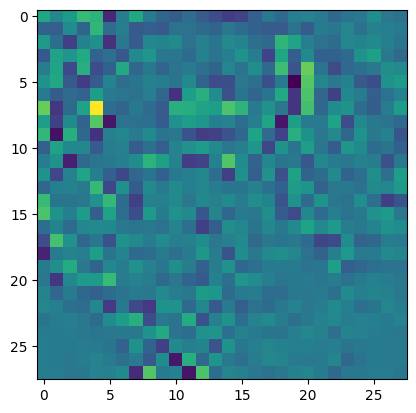

In [2]:
import matplotlib.pyplot as plt

######## Convolution with Laplacian Filter ##################
lap_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  #laplacian kernel


def conv_filter(lap_kernel, img_matrix):
    conv_img = []

    for i in range(1, img_matrix.shape[0] - 1):  #iterate through rows of image
        row = []
        for j in range(1, img_matrix.shape[1] - 1):  #iterate through columns of image
            local = []
            local.append(img_matrix.item(i - 1, j - 1))  ##1 slot up diagonally to the left of centroid
            local.append(img_matrix.item(i - 1, j))  #1 slot above centroid
            local.append(img_matrix.item(i - 1, j + 1))  #1 slot up diagonally to the right of centroid
            local.append(img_matrix.item(i, j - 1))  #1 slot to the left of centroid
            local.append(img_matrix.item(i, j))  #centroid of filter
            local.append(img_matrix.item(i, j + 1))  #1 slot to the right of centroid
            local.append(img_matrix.item(i + 1, j - 1))  #1 slot down diagonally to the left of centroid
            local.append(img_matrix.item(i + 1, j))  #1 slot below centroid
            local.append(img_matrix.item(i + 1, j + 1))  #1 slot down diagonally to the right of centroid

            local = np.array(local)
            local_mat = local.reshape(3, 3)
            matrix = local_mat * lap_kernel
            row.append(matrix.sum())  #sum of elements in new matrix

        conv_img.append(row)

    conv_img = np.mat(conv_img)  #image with convolution filter to matrix

    return conv_img

filtered_img = conv_filter(lap_kernel, img_matrix)

print(filtered_img[:10, :])  #first 10 rows

print(filtered_img.shape)  #shape of filtered image array

plt.imshow(filtered_img)  #show filtered image

### 1.3 Modification on Convolution Scheme

Conduct the convolution with the same filter as above, but change the stride to 2. **(5 Points)**

**Tasks:**
1. Modify the convolution process with stride=2
2. **PRINT OUT** convolution result for first ten rows.
3. **PRINT OUT** the shape of the convolution result.
4. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just reduce the centroid pool according to stride=2, and then, follow the same convolution process above.
    **Note: After increase of stride, the size of convolution result is further shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   98.  173.    5.    3.]\
 [  96. -163.   68.  -10.   37.]\
 [   7. -141. -127.  142.   -6.]\
 [  -1.  -46.  109.  -13.   11.]\
 [ 106.   49.  241.  -26.  -33.]]


![](https://drive.google.com/uc?export=view&id=1UPdXt5cY1umImu2chaQLfWAnqDEpFOGV)


[[ 134   98  173    5    3  -87  -92 -175  -77  -50   25  -58   -7  -12]
 [  96 -163   68  -10   37   49   18   43  -30  180   16  -43   28   11]
 [   7 -141 -127  142   -6  -23  -32   31   57  205  264 -135  -32   61]
 [  -1  -46  109  -13   11 -195  159 -120  -63  143  229 -165    8  -27]
 [ 106   49  241  -26  -33   69   84   24   13 -258   -3  125   40  -22]
 [ -79   41  -89   18  -31   26  103  -10   81   77  106  -88   51  -19]
 [  76   24   15 -144  -18   -6   36 -164  -80 -120  -65   45  -33  -32]
 [ 196  -18   71  -43   20   50   42   50   59 -111  -45  -15   58 -169]
 [ -38  -43   48   -9   -5   26 -164   61  -16   -5  126   96   -8   71]
 [-234   26  110   29  -39  -31   86 -111  -10   60  -27   15    1   44]]
(14, 14)


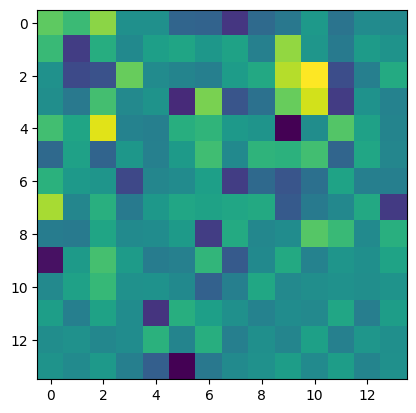

In [3]:
######## Convolution with Laplacian Filter and the setting of stride=2 ##################

def conv_filter_stride2(lap_kernel, img_matrix):
    conv_img = []

    for i in range(1, img_matrix.shape[0] - 1):  #iterate through rows of image
        if i % 2 == 0:
            continue
        row = []
        for j in range(1, img_matrix.shape[1] - 1):  #iterate through columns of image
            if j % 2 == 0:
                continue

            local = []
            local.append(img_matrix.item(i - 1, j - 1))  ##1 slot up diagonally to the left of centroid
            local.append(img_matrix.item(i - 1, j))  #1 slot above centroid
            local.append(img_matrix.item(i - 1, j + 1))  #1 slot up diagonally to the right of centroid
            local.append(img_matrix.item(i, j - 1))  #1 slot to the left of centroid
            local.append(img_matrix.item(i, j))  #centroid of filter
            local.append(img_matrix.item(i, j + 1))  #1 slot to the right of centroid
            local.append(img_matrix.item(i + 1, j - 1))  #1 slot down diagonally to the left of centroid
            local.append(img_matrix.item(i + 1, j))  #1 slot below centroid
            local.append(img_matrix.item(i + 1, j + 1))  #1 slot down diagonally to the right of centroid

            local = np.array(local)
            local_mat = local.reshape(3, 3)
            matrix = local_mat * lap_kernel
            row.append(matrix.sum())  #sum of elements in new matrix

        conv_img.append(row)

    conv_img = np.mat(conv_img)  #image with convolution filter to matrix

    return conv_img

filter_stride2 = conv_filter_stride2(lap_kernel, img_matrix)

print(filter_stride2[:10, :])  #first 10 rows

print(filter_stride2.shape)  #shape of filtered image array

plt.imshow(filter_stride2)  #show filtered image

### 1.4 Implementation of MaxPooling

Process the obtained array from the image with MaxPooling operation. **(15 Points)**

**Tasks:**
1. Prepare a 2X2 pooling mask.
2. Conduct max pooing on image with prepared mask.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just modify the centroid pool to top-left corner pool, and then, follow the same strategy above.\
    **Note: After the pooling, the size of the array is shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., pooled_results[0:5,0:5].The example figure is below.

[[ 98. 112.  93. 195. 173.]\
 [ 84. 127. 137. 253. 254.]\
 [ 85. 145. 225. 255. 242.]\
 [104. 178. 216. 230. 242.]\
 [ 95. 186. 147. 248. 242.]]

![](https://drive.google.com/uc?export=view&id=1a18IWjrN0xHcp7bSNuj8kUM4JFFj3ebd)



[[ 98 112  93 195 173 209 206 237 223 185 167 169 136  54]
 [ 84 127 137 253 254 249 241 250 236 224 181 173 124  55]
 [ 85 145 225 255 242 247 236 232 192 208 146 199 178 103]
 [104 178 216 230 242 238 176 218 186 198 203 165 179 168]
 [ 95 186 147 248 242 221  62  74  95 182 155  91 145 161]
 [201 201 229 217 210 188 169 164 111 154  81 104 104 141]
 [184 212 180 214 193 148 191 141 127 140 114 113 115 139]
 [172 105  61 149 189 119 106 120 109 148  95 110 102 110]
 [186  41  34 104 153  91 172 147  98 143 136  92  83  37]
 [207  94  42  75  95  99 104 120 101  94 116 149  83  64]]
(14, 14)


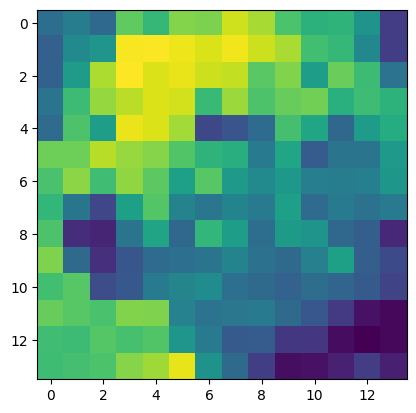

In [4]:
######## MaxPooling with the setting of 2X2 ##################

def max_pooling(img_matrix):
    max_pool = []

    for i in range(1, img_matrix.shape[0] - 1):  #iterate through rows of image
        if i % 2 == 0:  #skip every other row
            continue
        row = []
        for j in range(1, img_matrix.shape[1] - 1):  #iterate through columns of image
            if j % 2 == 0:  #skip every other column
                continue

            local = []
            local.append(img_matrix.item(i - 1, j - 1))  ##1 slot up diagonally to the left of centroid
            local.append(img_matrix.item(i - 1, j))  #1 slot above centroid
            local.append(img_matrix.item(i, j - 1))  #1 slot to the left of centroid
            local.append(img_matrix.item(i, j))  #centroid of filter

            row.append(np.max(local))  #sum of elements in new matrix

        max_pool.append(row)

    max_pool = np.mat(max_pool)  #image with convolution filter to matrix

    return max_pool

max_pool = max_pooling(img_matrix)

print(max_pool[:10, :])  #first 10 rows

print(max_pool.shape)  #shape of filtered image array

plt.imshow(max_pool)  #show filtered image